In [86]:
import SpiralMap as sp
import matplotlib.pyplot as plt
import os
plt.ion()
xsun=-8.277

### Exploring spiral models

#### First we need to initialise the main class by passing in the xsun. This also prints out the list of models currently available.

In [104]:
spirals = sp.main_(xsun=xsun)

AttributeError: 'reid_spiral' object has no attribute 'getarmlist'

#### This information can also be extracted by calling:

In [12]:
spirals.getinfo()

try self.getinfo(model) for more details

------------------------
    Available models:
0  Taylor_Cordes_1992
1    Drimmel_NIR_2000
2         Levine_2006
3        Hou_Han_2014
4           Reid_2019
5         Poggio_2021
6   Drimmel_ceph_2024
------------------------


#### To get details on a particular model (such as the number of arms and their names if available) we can call :

In [15]:
spirals.getinfo(model='Taylor_Cordes_1992')
spirals.getinfo(model='Reid_2019')

#####################
Model = Taylor_Cordes_1992

------------------------
  Arm list
0     Arm1
1     Arm2
2     Arm3
3     Arm4
------------------------
#####################
Model = Reid_2019

------------------------
  Arm list
0    3-kpc
1    Norma
2  Sct-Cen
3  Sgr-Car
4    Local
5  Perseus
6    Outer
------------------------


### Extracting and plotting data

#### The main class needs a set of attributes passed in, before we can extract or plot data. Internally this set is provided by default, and the columns can be viewed by calling the line below. To see a full description of each attribute, one can use help(spirals.getinfo).

In [19]:
spirals.plotattrs_default

{'plot': False,
 'markersize': 3,
 'coordsys': 'HC',
 'linewidth': 0.8,
 'linestyle': '-',
 'armcolour': '',
 'markSunGC': True,
 'xmin': '',
 'xmax': '',
 'ymin': '',
 'ymax': '',
 'polargrid': False}

#### The most important attributes to set are : a) plot (True or False), b) coordsys ('HC'  or 'GC') for heliocentric or galactocentric options. For example, let us consider the 'Drimmel_NIR_2000' model, which as the getinfo function shows has 2 arms and 2 interarm regions.

In [22]:
use_model = 'Drimmel_NIR_2000'
spirals.getinfo(model=use_model)

#####################
Model = Drimmel_NIR_2000

------------------------
     Arm list
0       1_arm
1       2_arm
2  3_interarm
3  4_interarm
------------------------


#### first let us simply extract the data (using the readout function) for this model, in this case for the first spiral arm. This generates a dictionary called dout which contains the cartesian trace of the specific arm.

In [13]:
plotattrs = {'plot':False,'coordsys':'HC','markersize':15}
spirals.readout(plotattrs,model=use_model,arm='1_arm')        
print(spirals.dout.keys())
print('first 4 data points..')
for ky in spirals.dout.keys():
    print(ky)
    print(spirals.dout[ky][:4])


dict_keys(['xhc', 'yhc', 'xgc', 'ygc', 'rgc', 'phi1'])
first 4 data points..
xhc
[6.24839007 6.02102088 5.7947277  5.57025546]
yhc
[3.60719937 3.53825196 3.45573027 3.35946876]
xgc
[-2.02860993 -2.25597912 -2.4822723  -2.70674454]
ygc
[3.60719937 3.53825196 3.45573027 3.35946876]
rgc
[4.13849557 4.19626843 4.25484988 4.31422025]
phi1
[1.05849947 1.00318968 0.94788972 0.89258571]


#### Instead to plot the data, we can set so in plotattrs, here plotting just one arm:

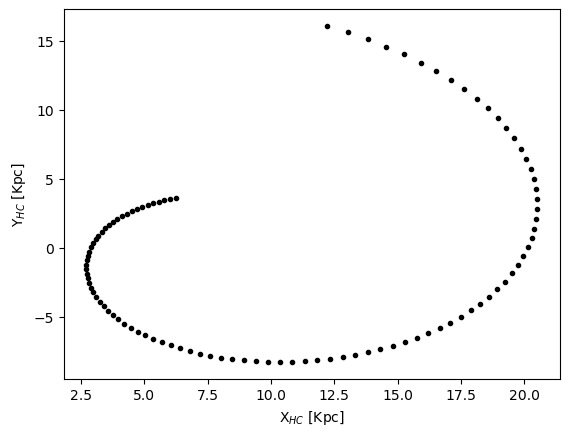

In [25]:
plotattrs = {'plot':True,'coordsys':'HC','markersize':15}
spirals.readout(plotattrs,model=use_model,arm='1_arm')        

#### here plotting all arms together:

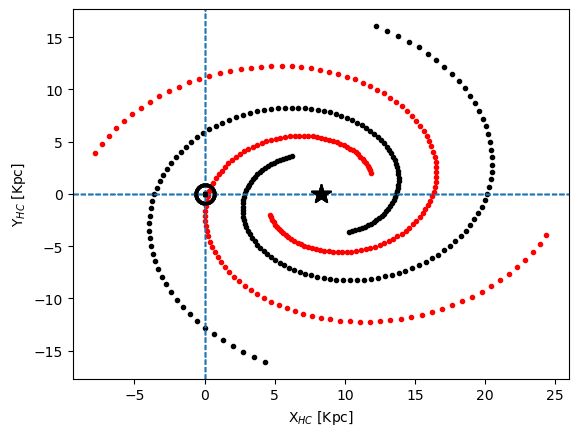

In [28]:
spirals.readout(plotattrs,model=use_model,arm='all')  

#### can also plot the same in Galactocentric coordinates:

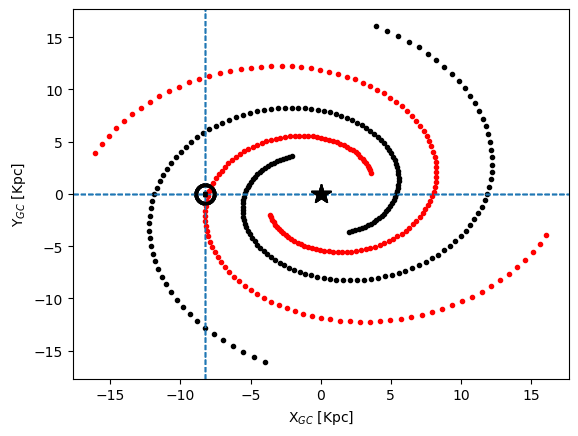

In [31]:
plotattrs = {'plot':True,'coordsys':'GC','markersize':15}
spirals.readout(plotattrs,model=use_model,arm='all')  

#### One can also overplot a polar grid (in both GC or HC frames)

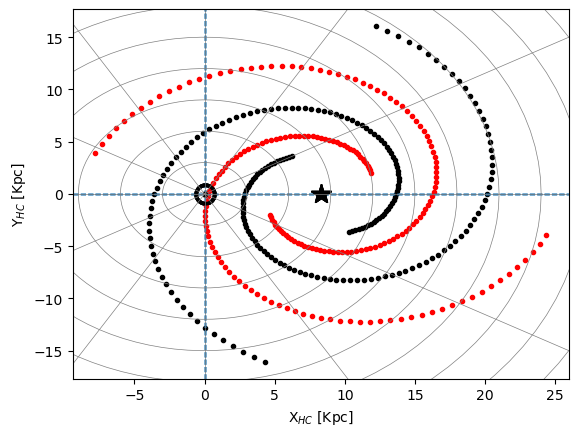

In [34]:
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm='all')  

#### putting it altogether

try self.getinfo(model) for more details

------------------------
    Available models:
0  Taylor_Cordes_1992
1    Drimmel_NIR_2000
2         Levine_2006
3        Hou_Han_2014
4           Reid_2019
5         Poggio_2021
6   Drimmel_ceph_2024
------------------------


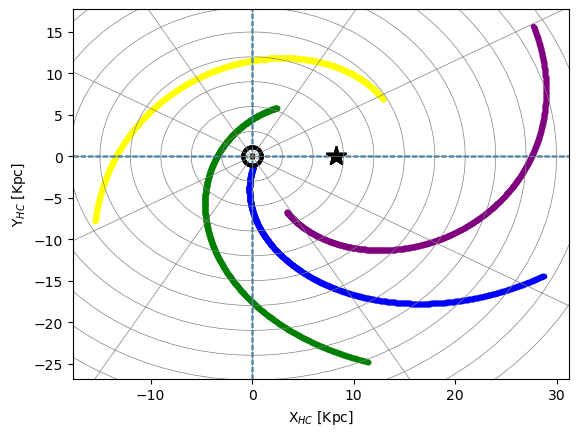

In [37]:
use_model = 'Levine_2006'
spirals = sp.main_(xsun=xsun)
plotattrs = {'plot':True,'coordsys':'HC','markersize':15,'polargrid':True}
spirals.readout(plotattrs,model=use_model,arm='all')  

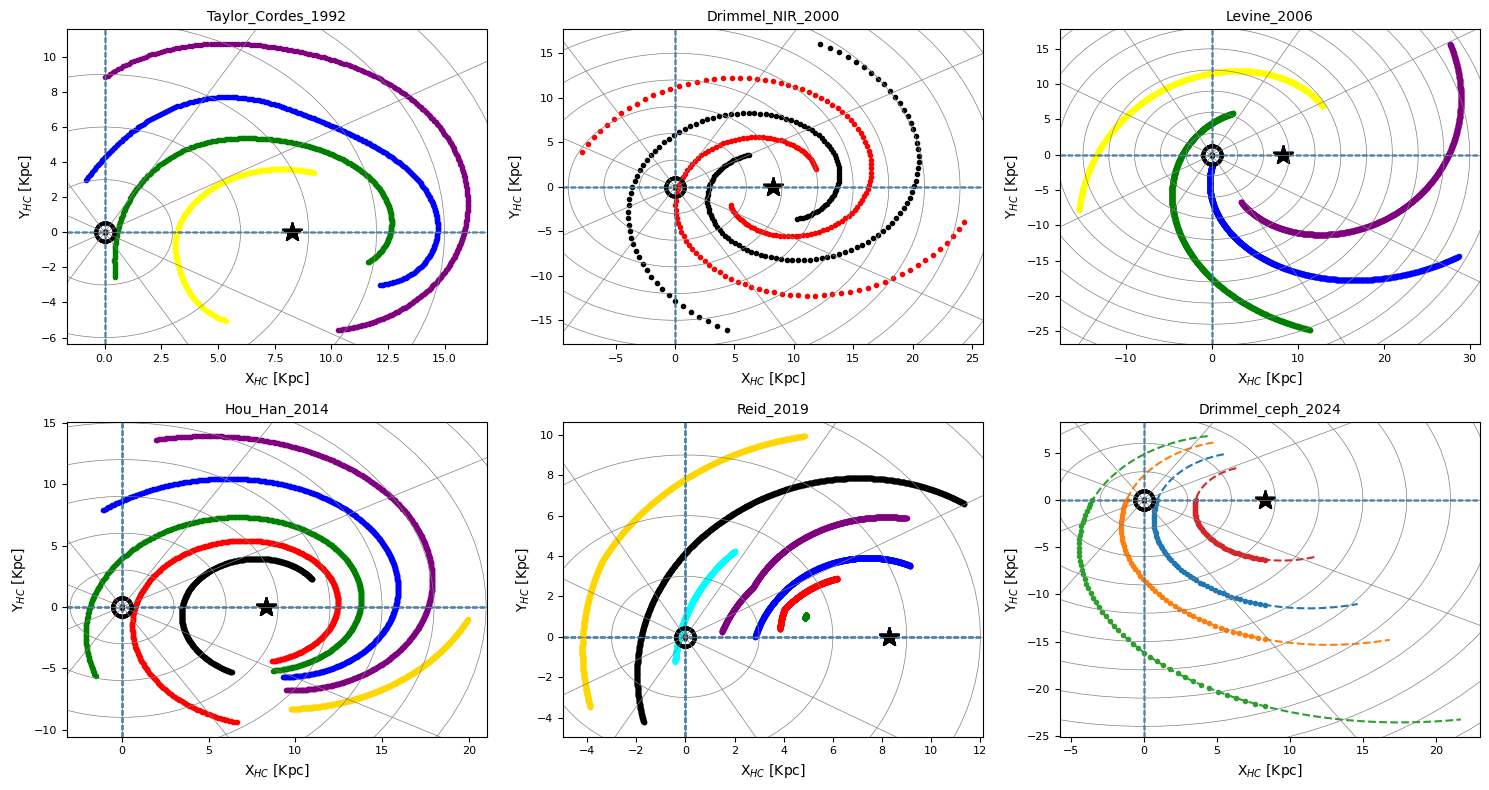

In [64]:


# List of all available models
models = [
    'Taylor_Cordes_1992',
    'Drimmel_NIR_2000',
    'Levine_2006',
    'Hou_Han_2014',
    'Reid_2019',
    'Drimmel_ceph_2024'
]

# Create a 3x3 grid of subplots (adjust figsize if needed)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Common plot attributes
plotattrs = {'plot': True, 'coordsys': 'HC', 'markersize': 15, 'polargrid': True}

# Plot each model in its own subplot
for i, model in enumerate(models):
    ax = axes[i]
    plt.sca(ax)  # Set current axes
    spirals.readout(plotattrs, model=model, arm='all')
    ax.set_title(model, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide unused subplots
for j in range(len(models), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig("spiral_models_polargrid_HC.png", dpi=300, bbox_inches='tight')
plt.show()

try self.getinfo(model) for more details

------------------------
    Available models:
0  Taylor_Cordes_1992
1    Drimmel_NIR_2000
2         Levine_2006
3        Hou_Han_2014
4           Reid_2019
5         Poggio_2021
6   Drimmel_ceph_2024
------------------------


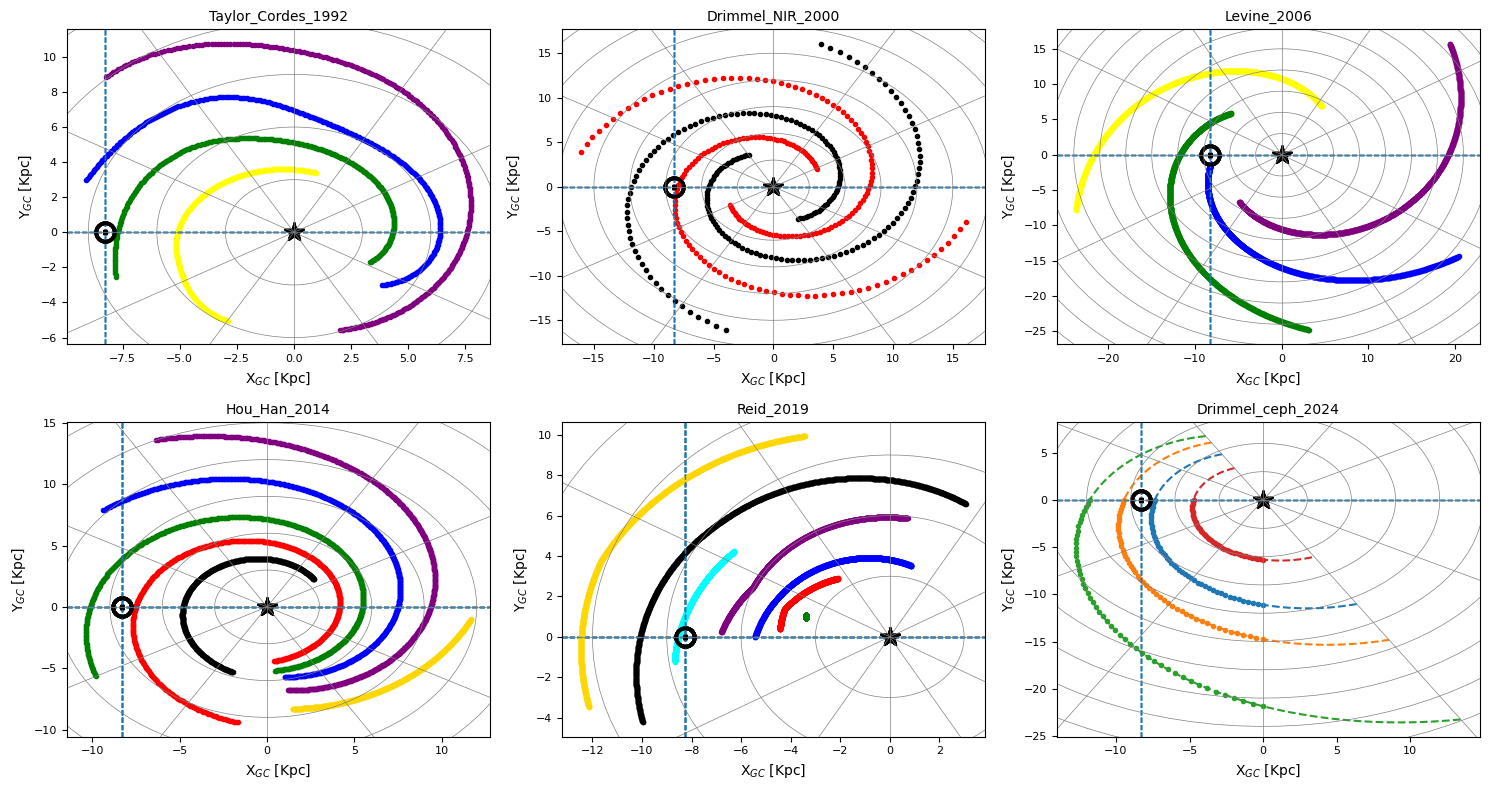

In [58]:
import matplotlib.pyplot as plt

# Generate spiral data once
spirals = sp.main_(xsun=xsun)

# List of all available models
models = [
    'Taylor_Cordes_1992',
    'Drimmel_NIR_2000',
    'Levine_2006',
    'Hou_Han_2014',
    'Reid_2019',
    'Drimmel_ceph_2024'
]

# Create a 3x3 grid of subplots (adjust figsize if needed)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Common plot attributes
plotattrs = {'plot': True, 'coordsys': 'GC', 'markersize': 15, 'polargrid': True}

# Plot each model in its own subplot
for i, model in enumerate(models):
    ax = axes[i]
    plt.sca(ax)  # Set current axes
    spirals.readout(plotattrs, model=model, arm='all')
    ax.set_title(model, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide unused subplots
for j in range(len(models), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig("spiral_models_polargrid_GC.png", dpi=300, bbox_inches='tight')
plt.show()